# Student Performance Indicator

###  Life cycle of an ML project

1) Understanding the problem statement
2) Data Collection
3) Data Checks to perform
4) Exploratory data analysis
5) Data Pre-processing
6) Model Training
7) Choose the best model

### 1. Problem statement
##### This project understands how students' performance (test scores) is affected by their gender, ethnicity, parental level of education, lunch and test preparation course

### 2. Data Collection
#### Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### 2.1 Import Data and required packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

##### Import CSV data as pandas dataframe

In [3]:
df = pd.read_csv('stud.csv')

#### Top 5 records


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2.2 Dataset information

- gender - Male/Female
- ethnicity - Group A, B, C, D or E
- parental level of education - (bachelor's degree, some college, master's defree, associate's degree high school)
- lunch - having lunch before test - standard or free/reduced
- test preparation course - complete or not complete before test
- math score
- reading score
- writing score


### 3. Data checks to perform

- check for missing values
- check duplicates
- check data type
- no of unique values in each column
- check statistics of data set
- check verious categories present in the different categorical column

### 3. Check missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Check duplicates 
df.duplicated().sum()

0

In [7]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.1 Correlation

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 3.2 Exploring Data

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [13]:
df['writing score'].dtype
df['gender'].dtype

dtype('O')

In [14]:
#defining the numeric and non-numeric features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"There are {len(numeric_features)} numeric features : {numeric_features}")
print(f"And {len(categorical_features)} non-numeric features : {categorical_features}")

There are 3 numeric features : ['math score', 'reading score', 'writing score']
And 5 non-numeric features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.3 Adding columns for total score and average

In [15]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
writing_full = df[df['writing score'] == 100]['average'].count()
reading_full = df[df['reading score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [17]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights
- from the above values, we see that students performed the worst in Math
- the best performace was in the reading section

### 4. Exploring Data (visualization)
4.1 Visualize average score distribution
- Histogram
- KDE

4.1 Histogram

<AxesSubplot: xlabel='average', ylabel='Count'>

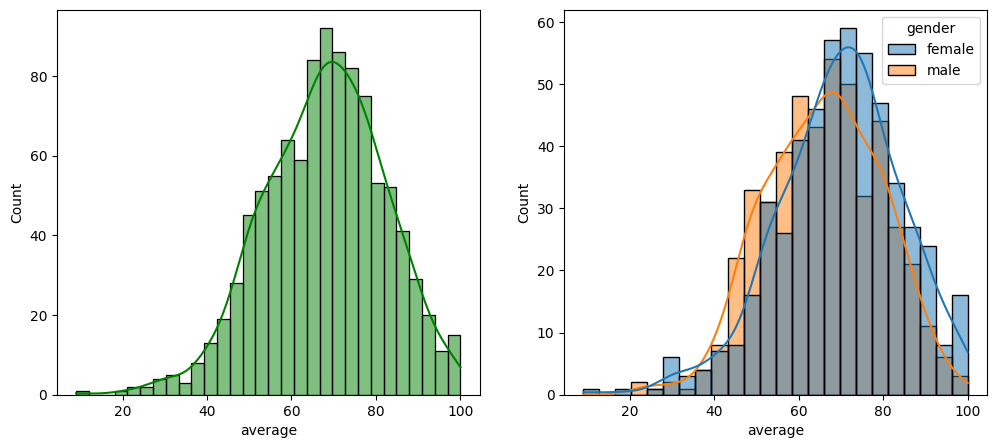

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5)) # 1 - The number of rows in the grid of subplots.
plt.subplot(121)                                #2 - The number of columns in the grid of subplots.
sns.histplot(data=df, x='average', bins=30, kde=True, color='g') #figsize=(15, 7) - The size of the figure in inches, where 15 is the width and 7 is the height.
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

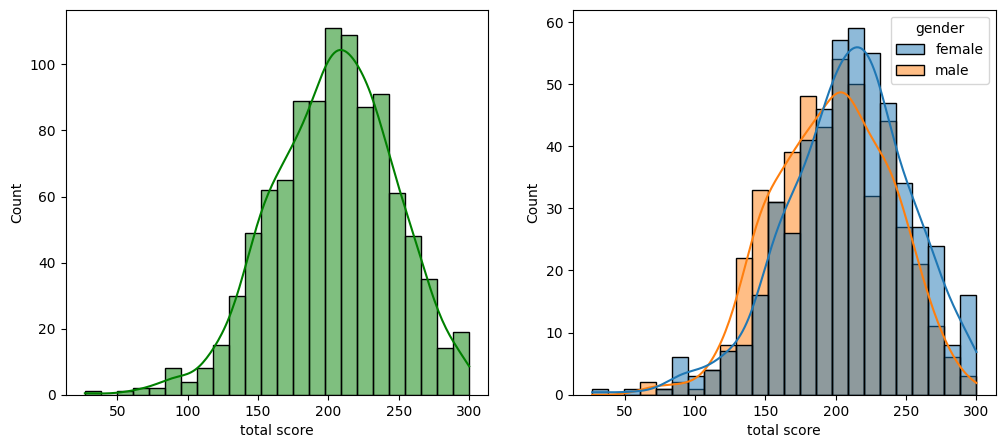

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(121) # 1 is the row numnber, 2 is the col number and 1 is the position of the graph in the grid
sns.histplot(data=df, x='total score', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

#### Insights  
- Female students score higher than male students

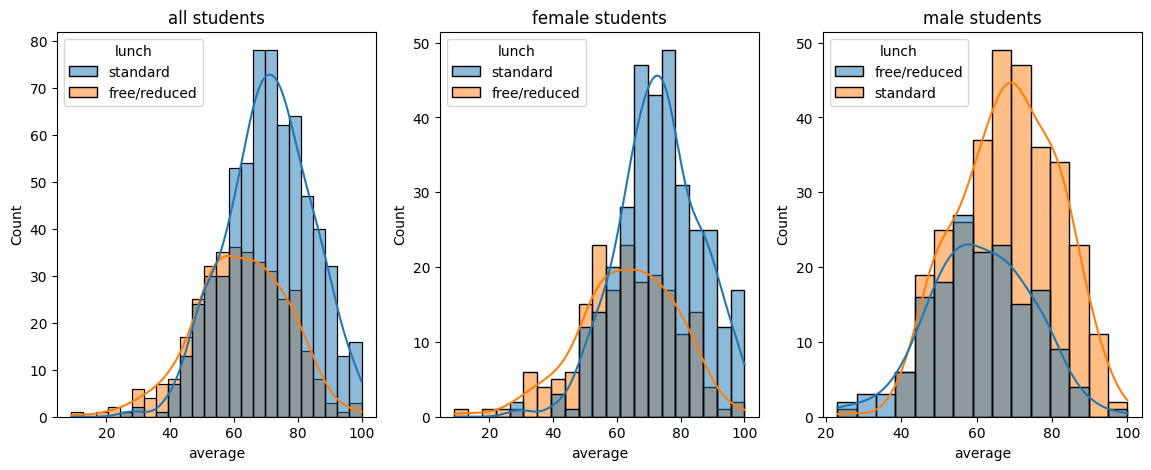

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
plt.subplot(131)
plt.title("all students")
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(133)
plt.title("male students")
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.subplot(132)
plt.title("female students")
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.show()

#### Insights  
- Amongst both males and females, those who had a standard lunch scored better on average

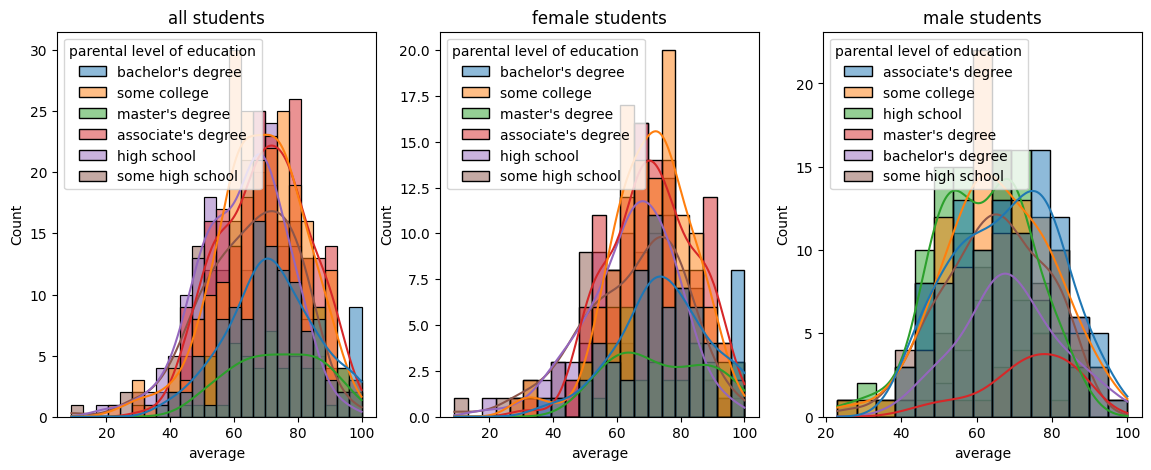

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
plt.subplot(131)
plt.title("all students")
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(133)
plt.title("male students")
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')
plt.subplot(132)
plt.title("female students")
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.show()

Insights

<AxesSubplot: title={'center': 'male'}, xlabel='average', ylabel='Count'>

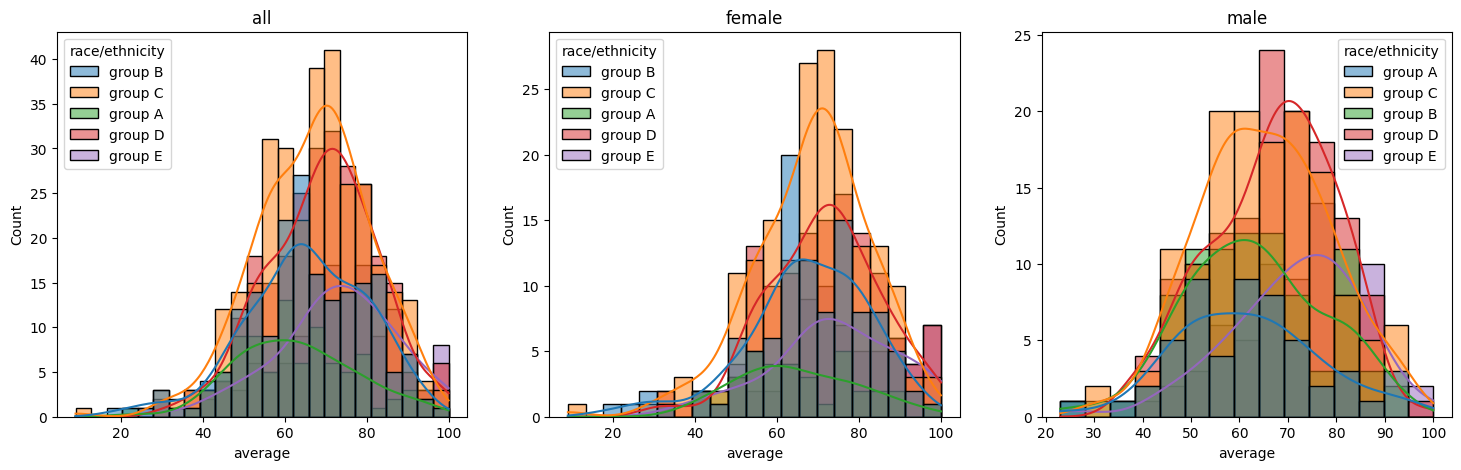

In [22]:
plt.subplots(1, 3, figsize=(18, 5))
plt.subplot(131)
plt.title('all')
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(132)
plt.title('female')
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(133)
plt.title('male')
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race/ethnicity')

Insights

- in 'all', group C&D have the highest numbers on an average score. Whereas groups A&B ten to perform poorly.
- amongst females, group D scores the highest and group C is the highest populous with a slightly above average score
- amongst males, group D scores almost always above 65

4.2 Max score of students in each subject


In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot: title={'center': 'Reading'}, xlabel='reading score', ylabel='Count'>

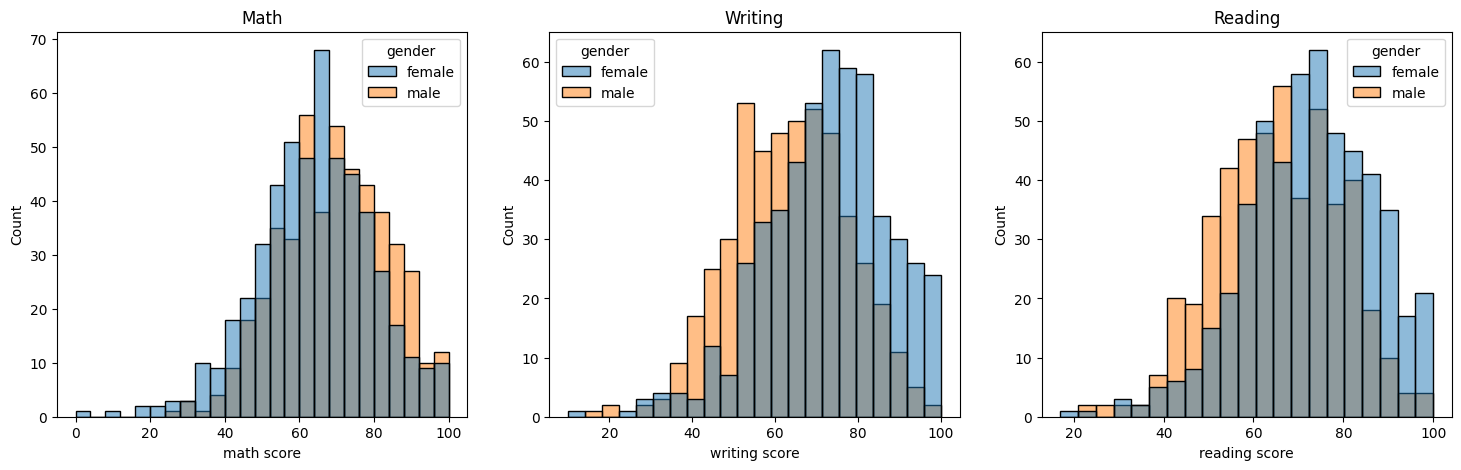

In [24]:
#df[df['gender']=='female'].count

plt.subplots(1, 3, figsize=(18,5))
plt.subplot(131)
plt.title("Math")
sns.histplot(data=df, x='math score', hue='gender')
plt.subplot(132)
plt.title("Writing")
sns.histplot(data=df, x='writing score', hue='gender')
plt.subplot(133)
plt.title("Reading")
sns.histplot(data=df, x='reading score', hue='gender')

Insights 
- Males score better on average than females in Math
- Females score better on average than males in writing
- Females score better on average than males in reading

<AxesSubplot: title={'center': 'Reading'}, xlabel='race/ethnicity', ylabel='reading score'>

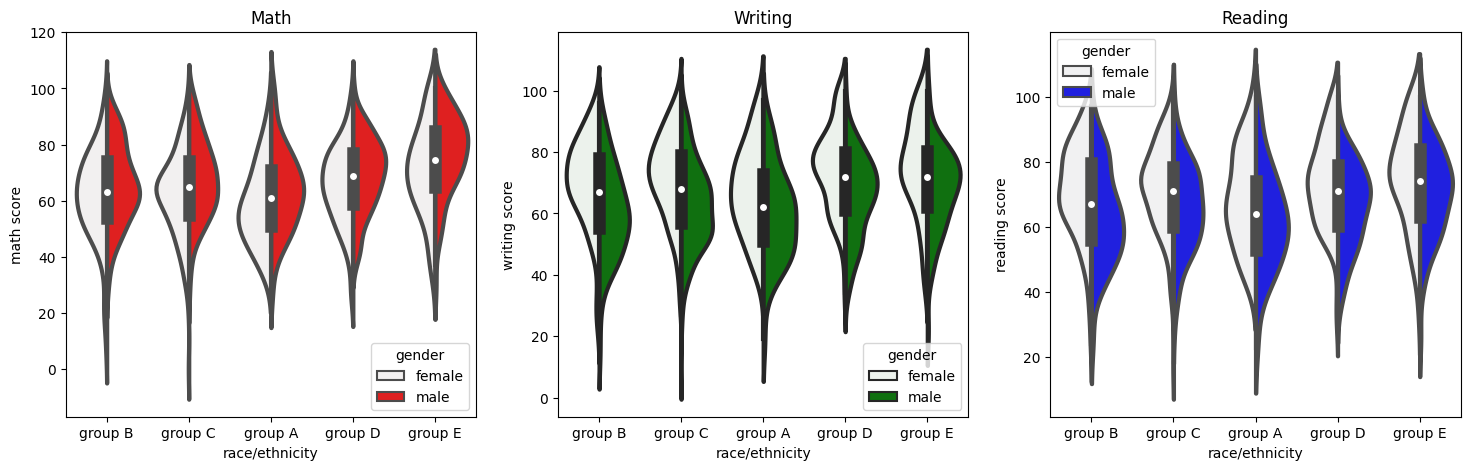

In [25]:
plt.subplots(1, 3, figsize=(18,5))
plt.subplot(131)
plt.title("Math")
sns.violinplot(data=df, x='race/ethnicity', y='math score', color='red', linewidth=3, hue='gender', split=True)
plt.subplot(132)
plt.title("Writing")
sns.violinplot(data=df, x='race/ethnicity', y='writing score', color='green', linewidth=3, hue='gender', split=True)
plt.subplot(133)
plt.title("Reading")
sns.violinplot(data=df, x='race/ethnicity', y='reading score', color='blue', linewidth=3, hue='gender', split=True)

Insights
- The highest scores across the three subjects are from Math
- The lowest scores across the three subjects are from Reading


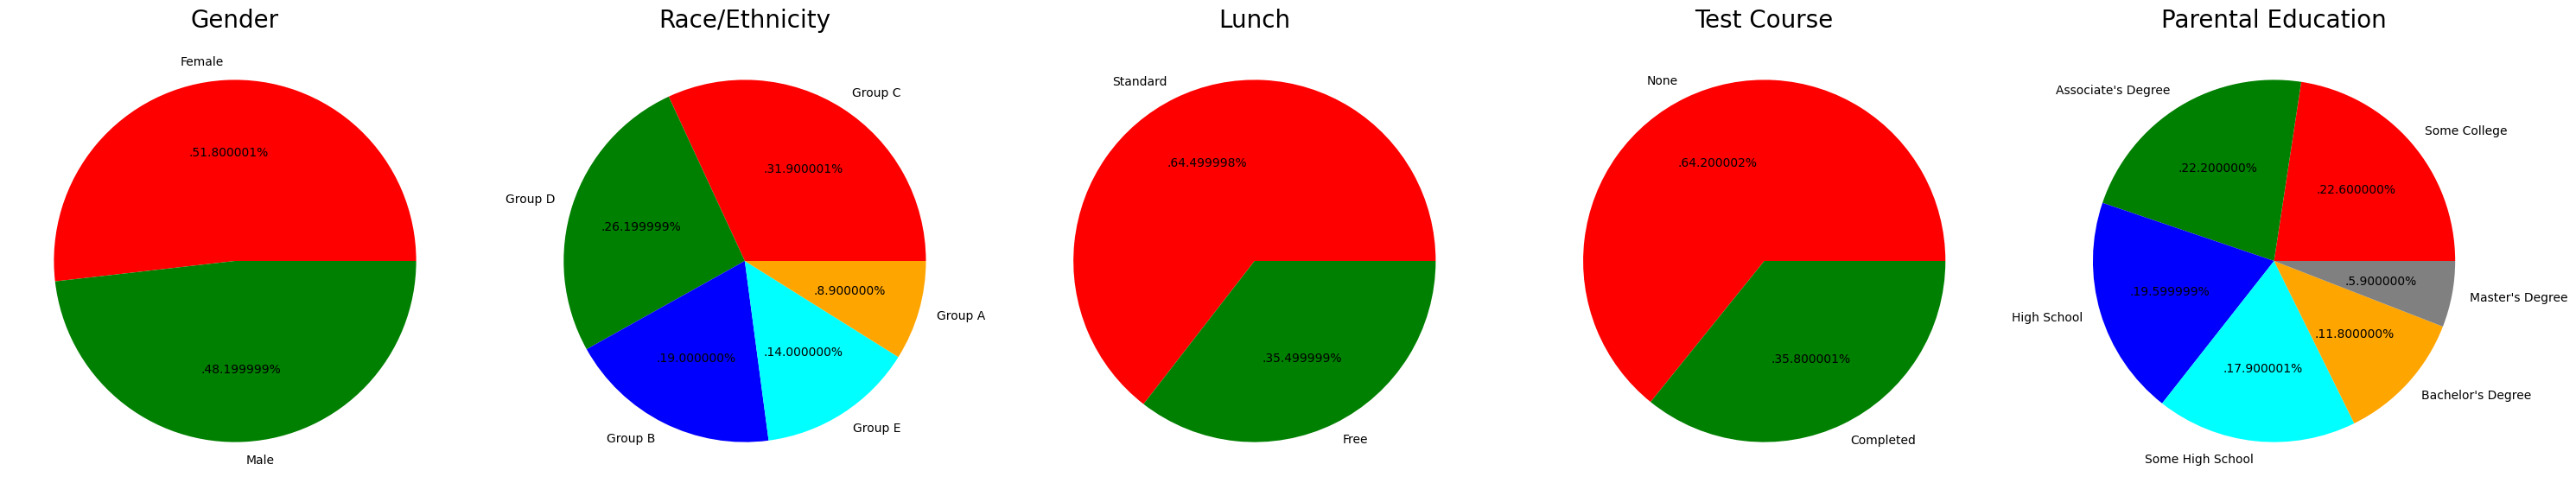

In [26]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C under race/ethnicity
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

4.4 Feature Wise Visualization

4.4.1 GENDER COLUMN
- How is distribution of Gender?
- Does gender have any impact on a student's performance?


UNIVARIATE ANALYSIS (Distribution of Gender)

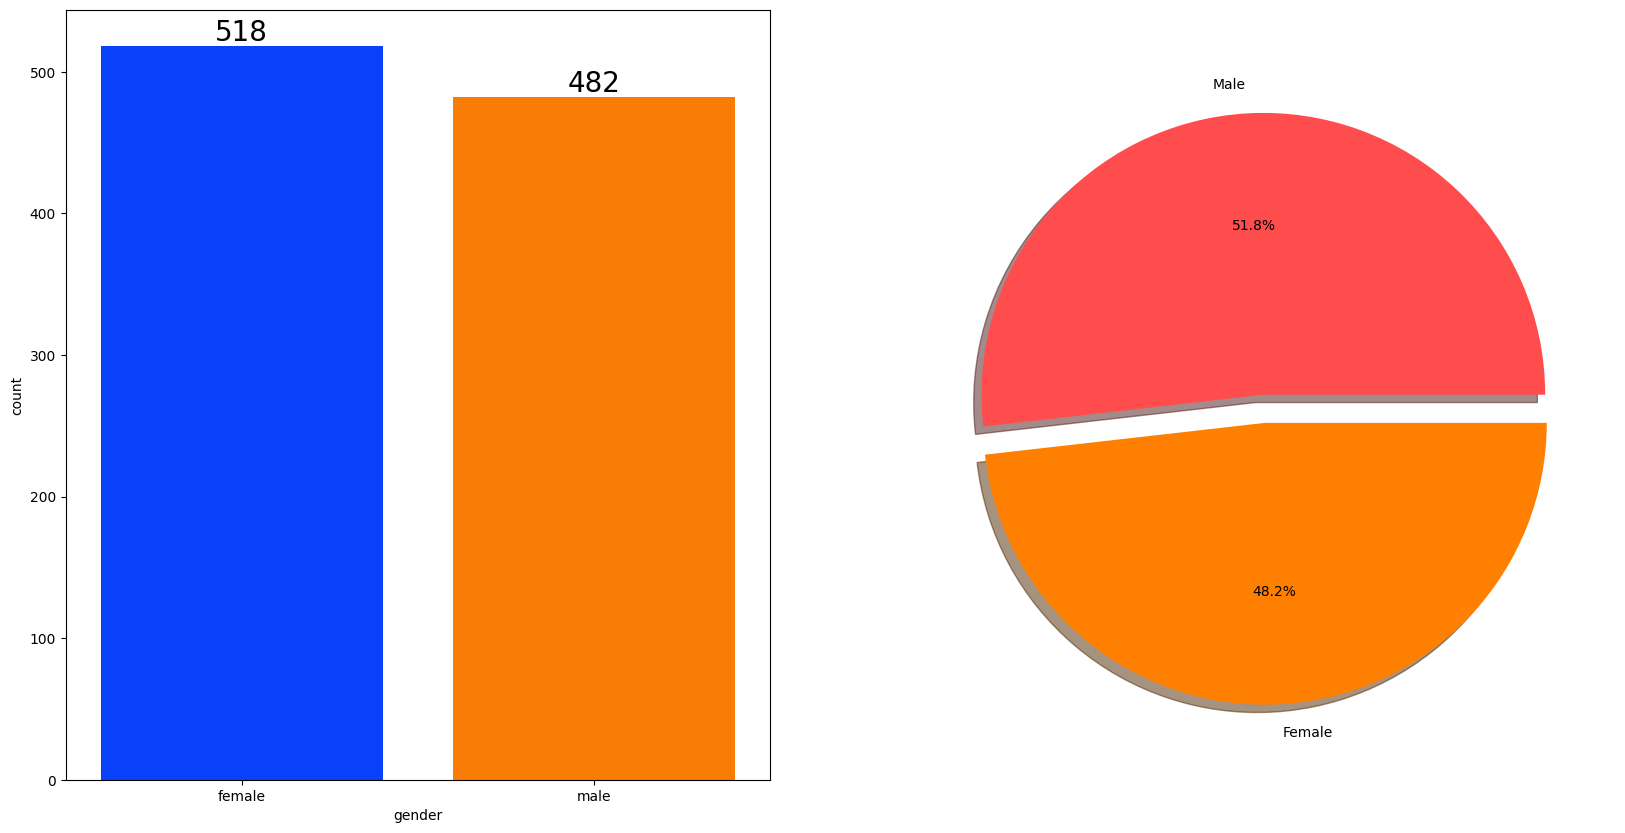

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers :
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [34]:
gender_group = df.groupby('gender').mean()
gender_group

C:\Users\aarja\AppData\Local\Temp\ipykernel_33560\3006147241.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = df.groupby('gender').mean()


,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


[0 1]


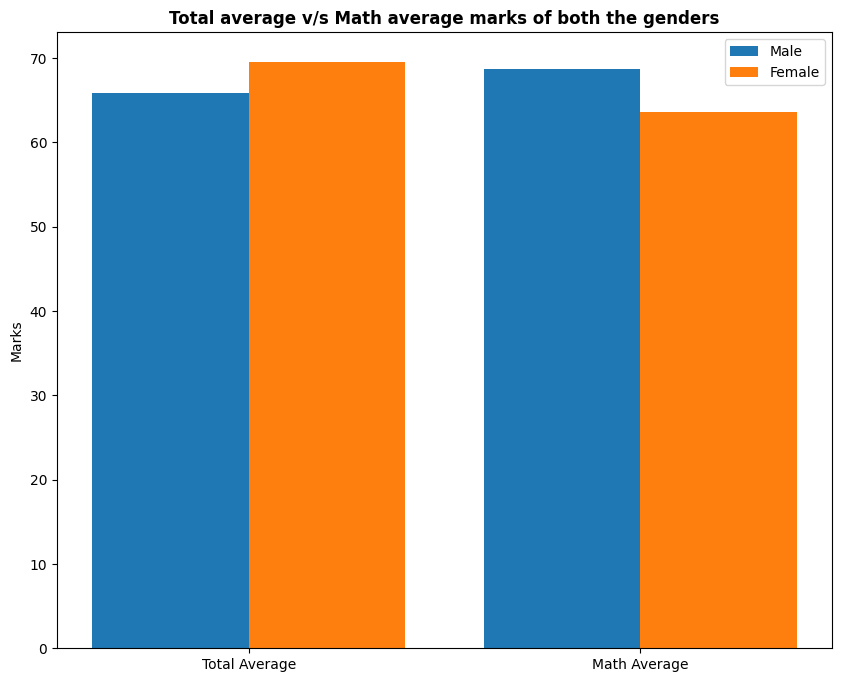

In [43]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
print(X_axis)

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
- On average, females have a better overall score than men.
- Whereas males have scored higher in Maths.

4.4.2 RACE/EHNICITY COLUMN
- How is the group wise distribution?
- Does Race/Ehnicity have any impact on a student's performance?

UNIVARIATE ANALYSIS

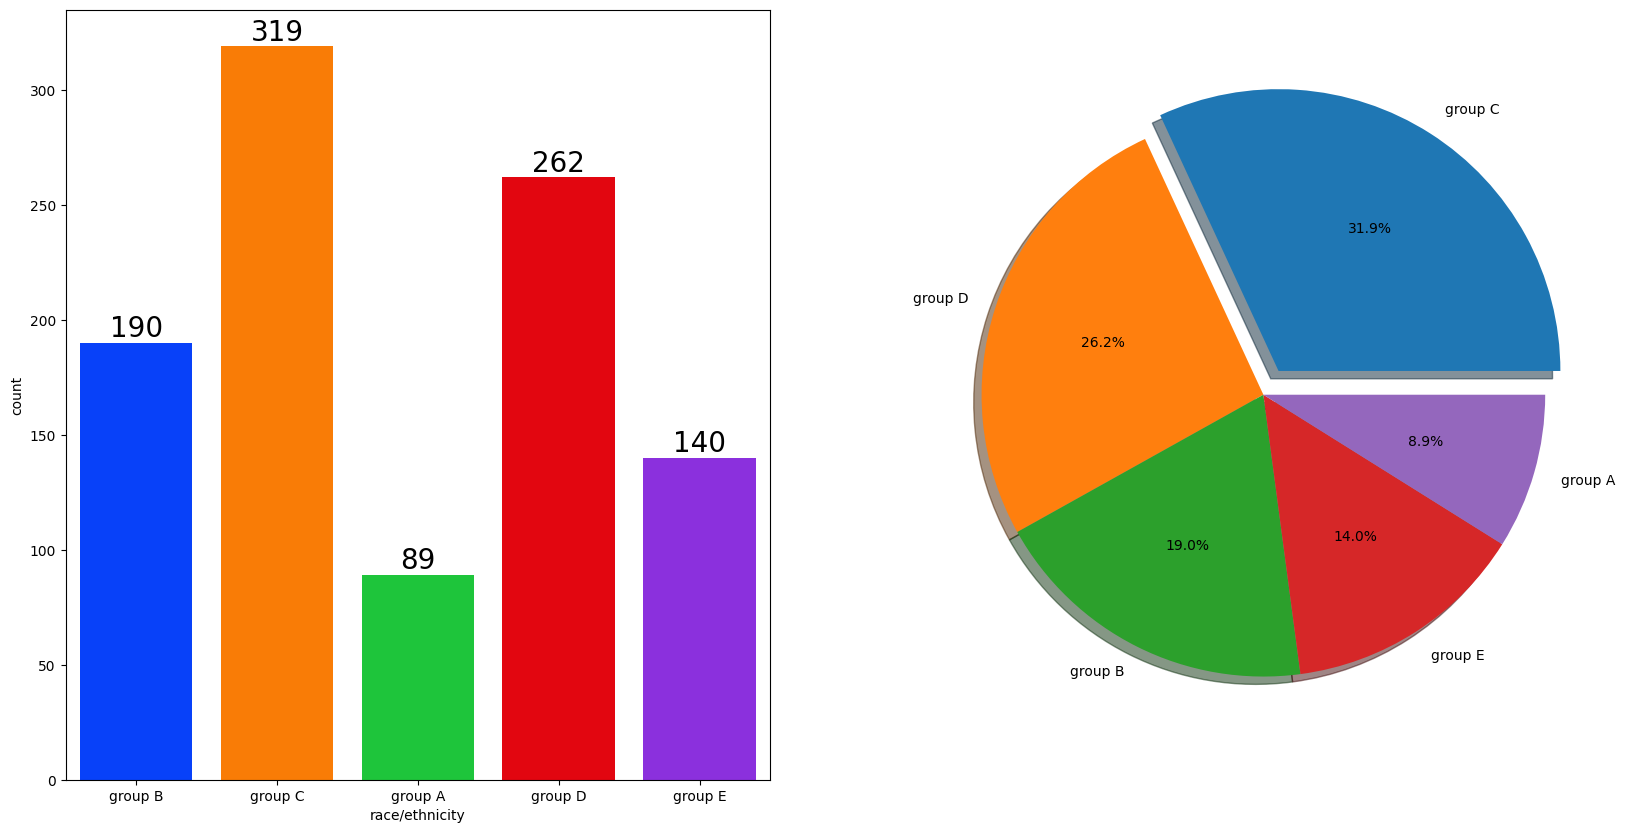

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

BIVARIATE ANALYSIS

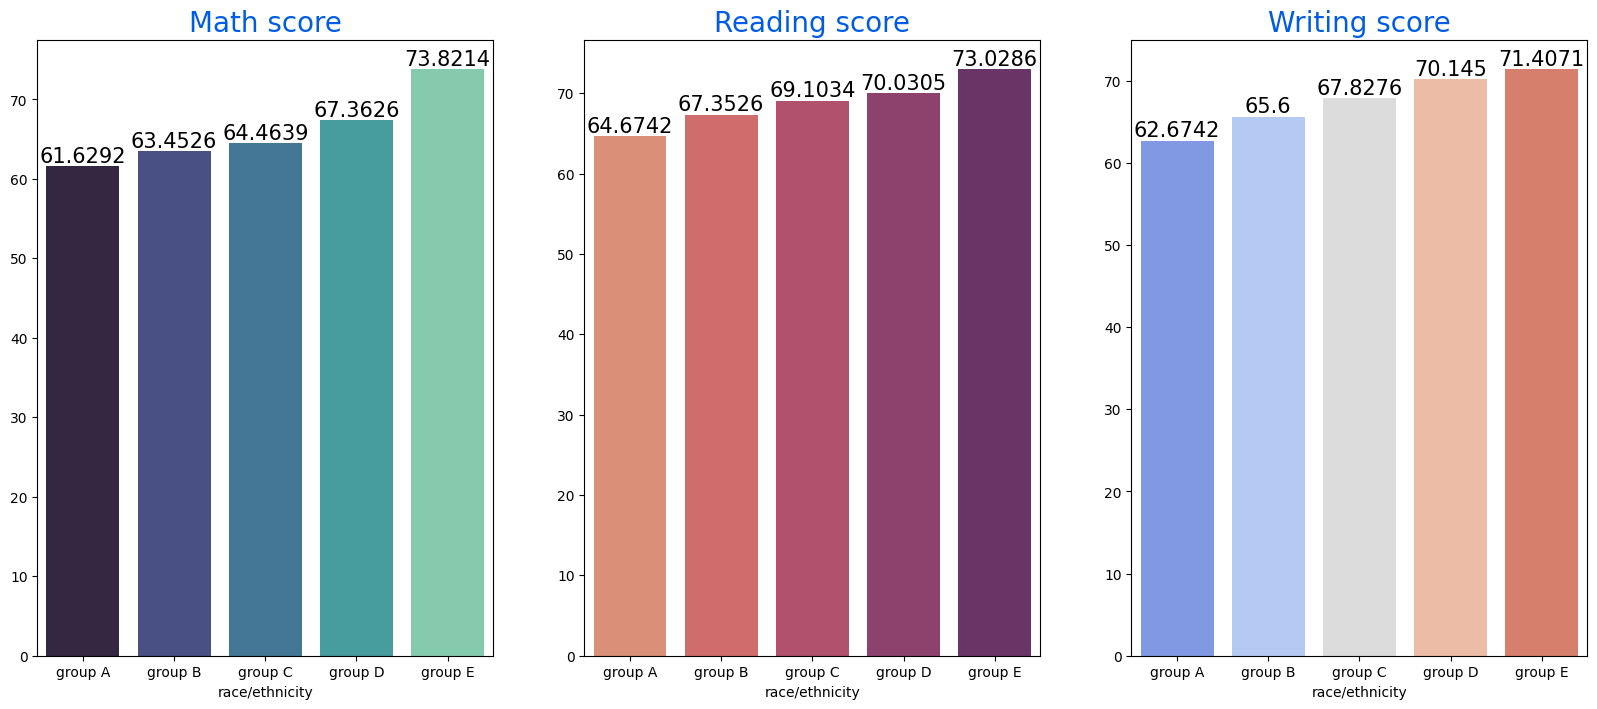

In [45]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower socioeconomic status have a lower average in all course subjects

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

UNIVARIATE ANALYSIS

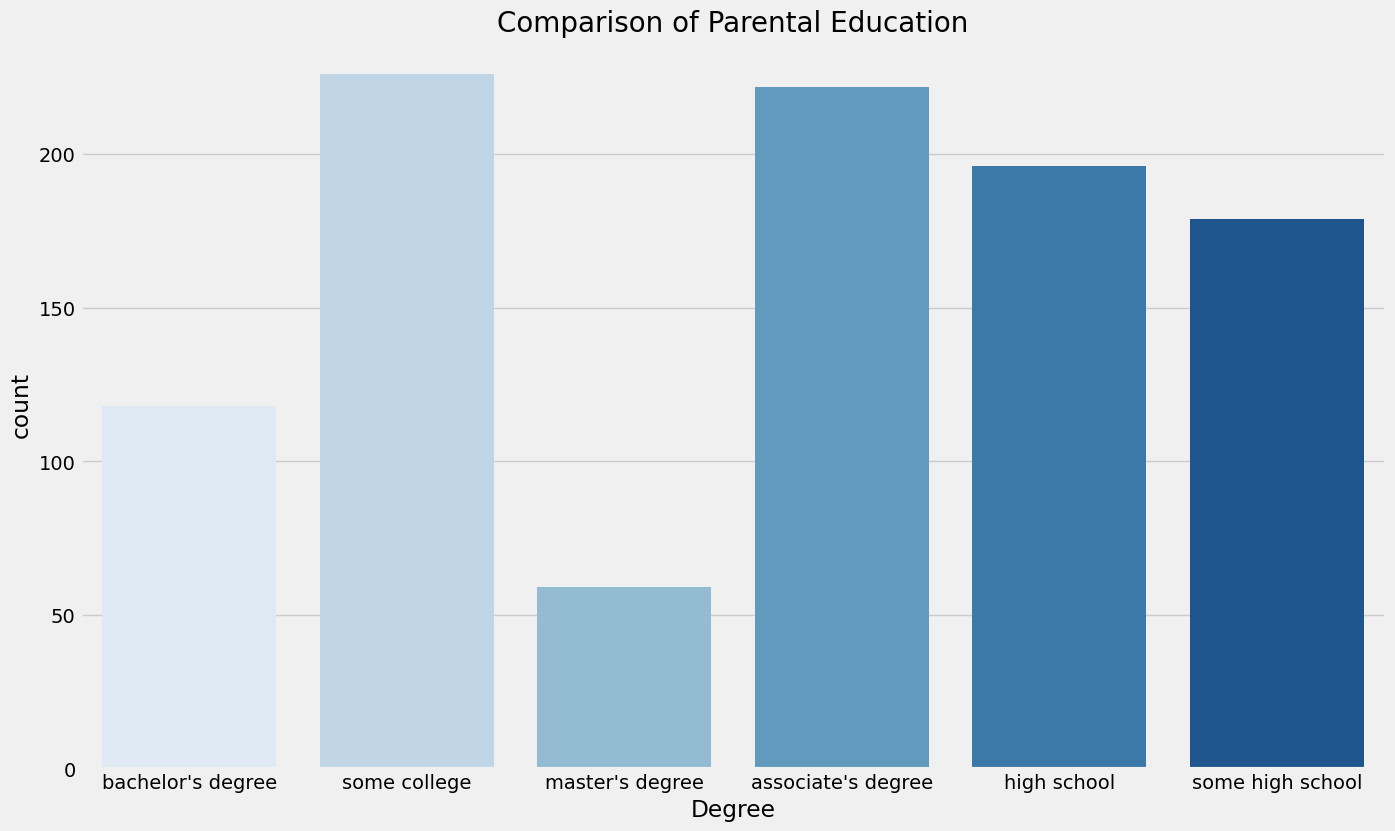

In [47]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df, x='parental level of education', palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

C:\Users\aarja\AppData\Local\Temp\ipykernel_33560\3111261625.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('parental level of education').mean().plot(kind='barh',figsize=(10,10))


<AxesSubplot: ylabel='parental level of education'>

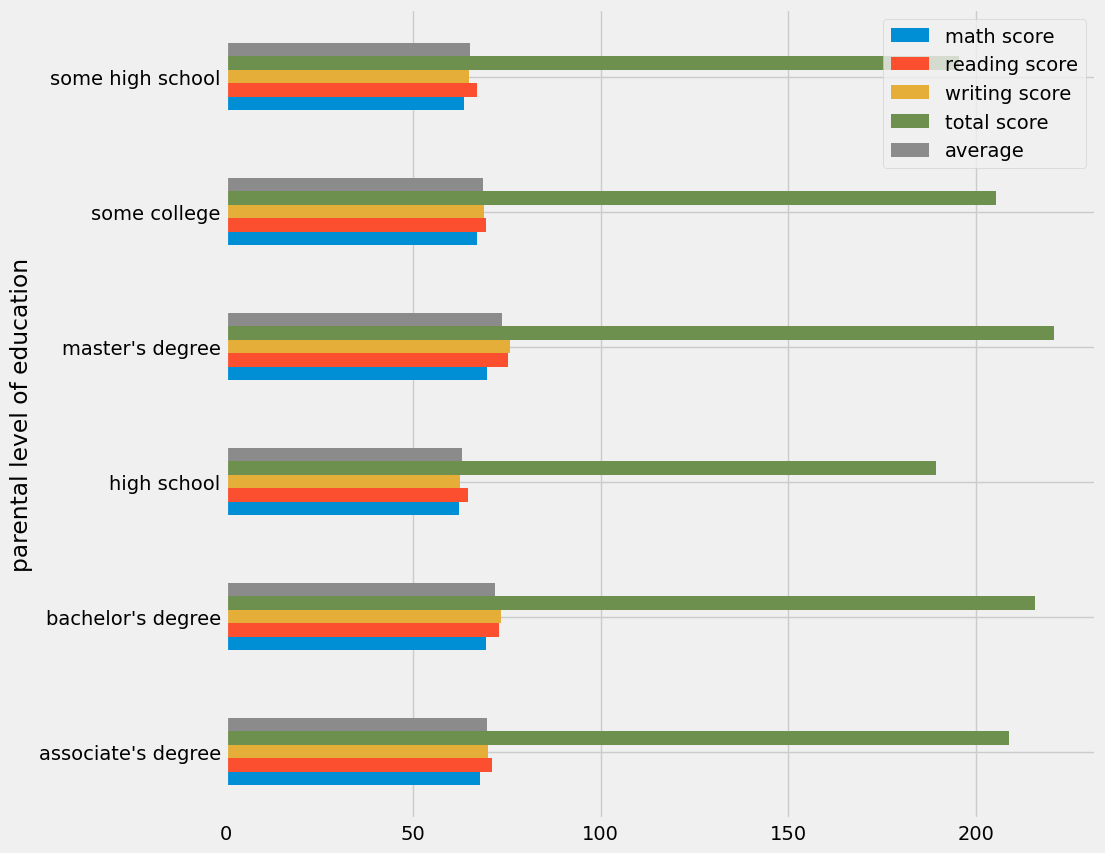

In [48]:
df.groupby('parental level of education').mean().plot(kind='barh',figsize=(10,10))

Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

4.4.4 LUNCH COLUMN

UNIVARIATE ANALYSIS

C:\Users\aarja\AppData\Local\Temp\ipykernel_33560\686926112.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


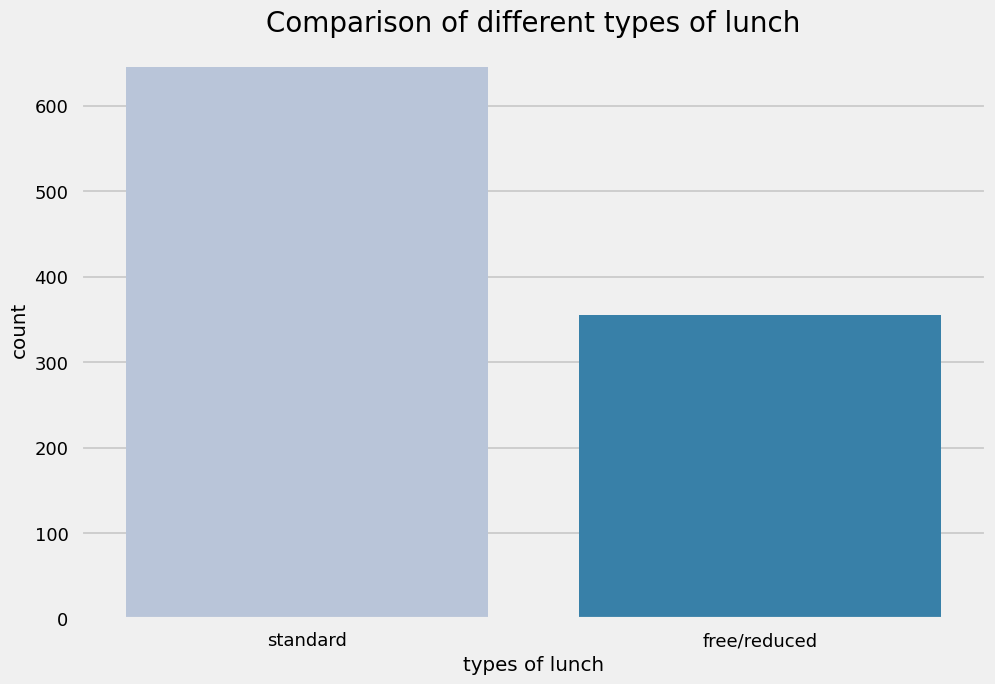

In [50]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(data=df, x='lunch', palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights
- Almost twice the number of students had the standard lunch over the free/reduced lunch

BIVARIATE ANALYSIS

In [51]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


C:\Users\aarja\AppData\Local\Temp\ipykernel_33560\2025192962.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('lunch').mean().plot(kind='bar')


"sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])\nax[0].set_title('Students vs test preparation course ',color='black',size=25)\nfor container in ax[0].containers:\n    ax[0].bar_label(container,color='black',size=20)\n    \nsns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])\nfor container in ax[1].containers:\n    ax[1].bar_label(container,color='black',size=20)  "

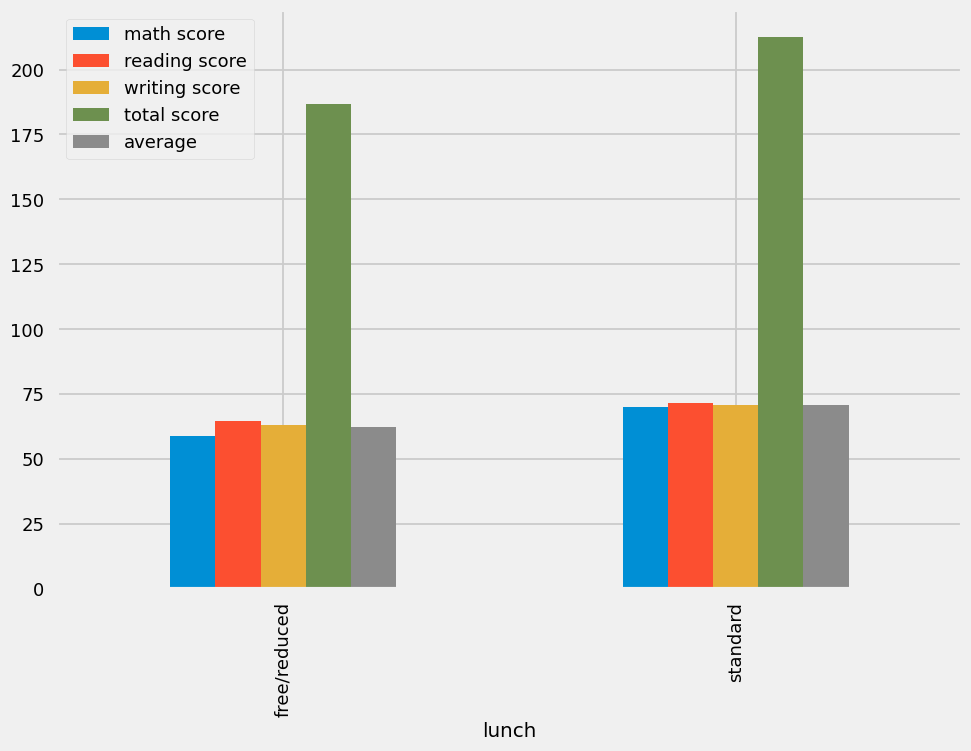

In [71]:
#f,ax=plt.subplots(1,2,figsize=(20,8))
df.groupby('lunch').mean().plot(kind='bar')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
"""sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  """

Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

4.4.5 TEST PREPARATION COURSE COLUMN

UNIVARIATE ANALYSIS

<AxesSubplot: xlabel='test preparation course', ylabel='writing score'>

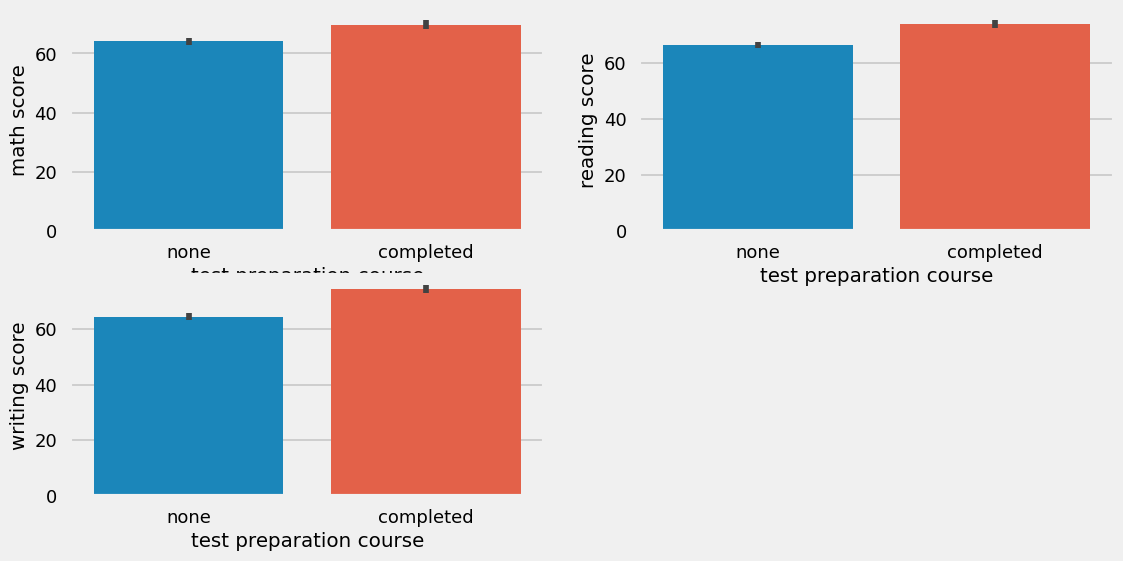

In [73]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['test preparation course'], y=df['math score'])
plt.subplot(2,2,2)
sns.barplot (x=df['test preparation course'], y=df['reading score'])
plt.subplot(2,2,3)
sns.barplot (x=df['test preparation course'], y=df['writing score'])

Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

4.4.6 CHECKING FOR OUTLIERS

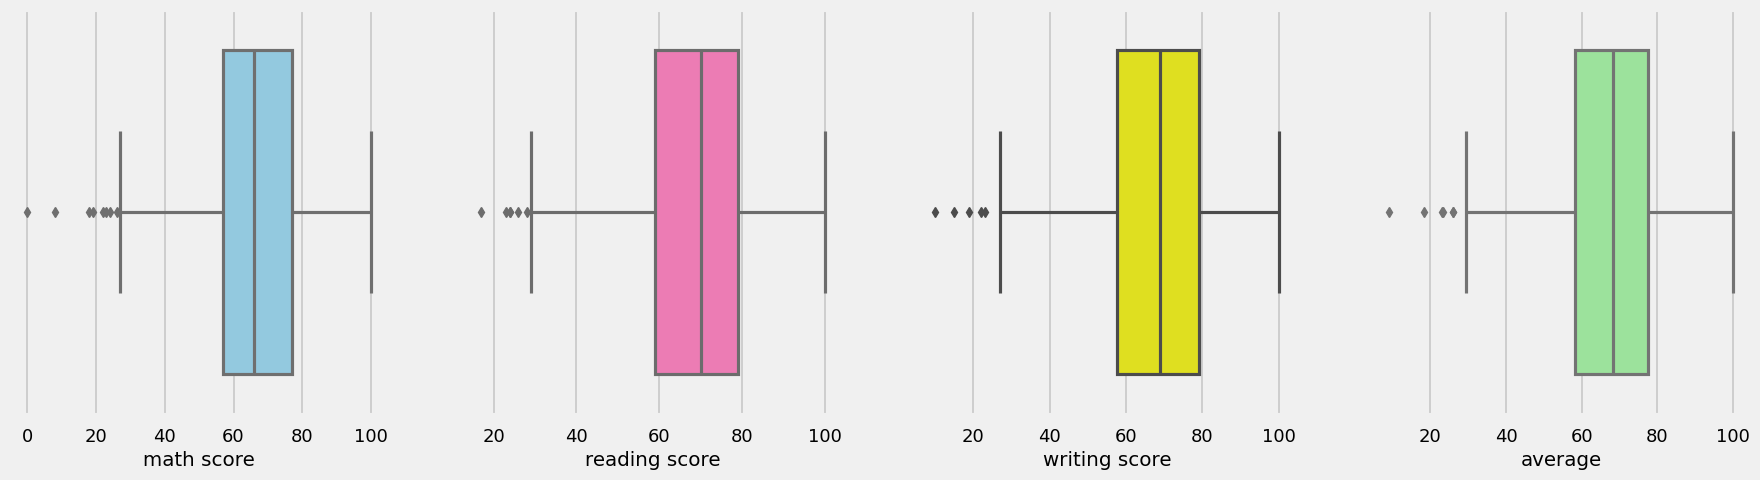

In [81]:
plt.subplots(1,4,figsize=(20,5))
plt.subplot(141)
sns.boxplot(x=df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(x=df['reading score'], color='hotpink')
plt.subplot(143)
sns.boxplot(x=df['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(x=df['average'], color='lightgreen')
plt.show()

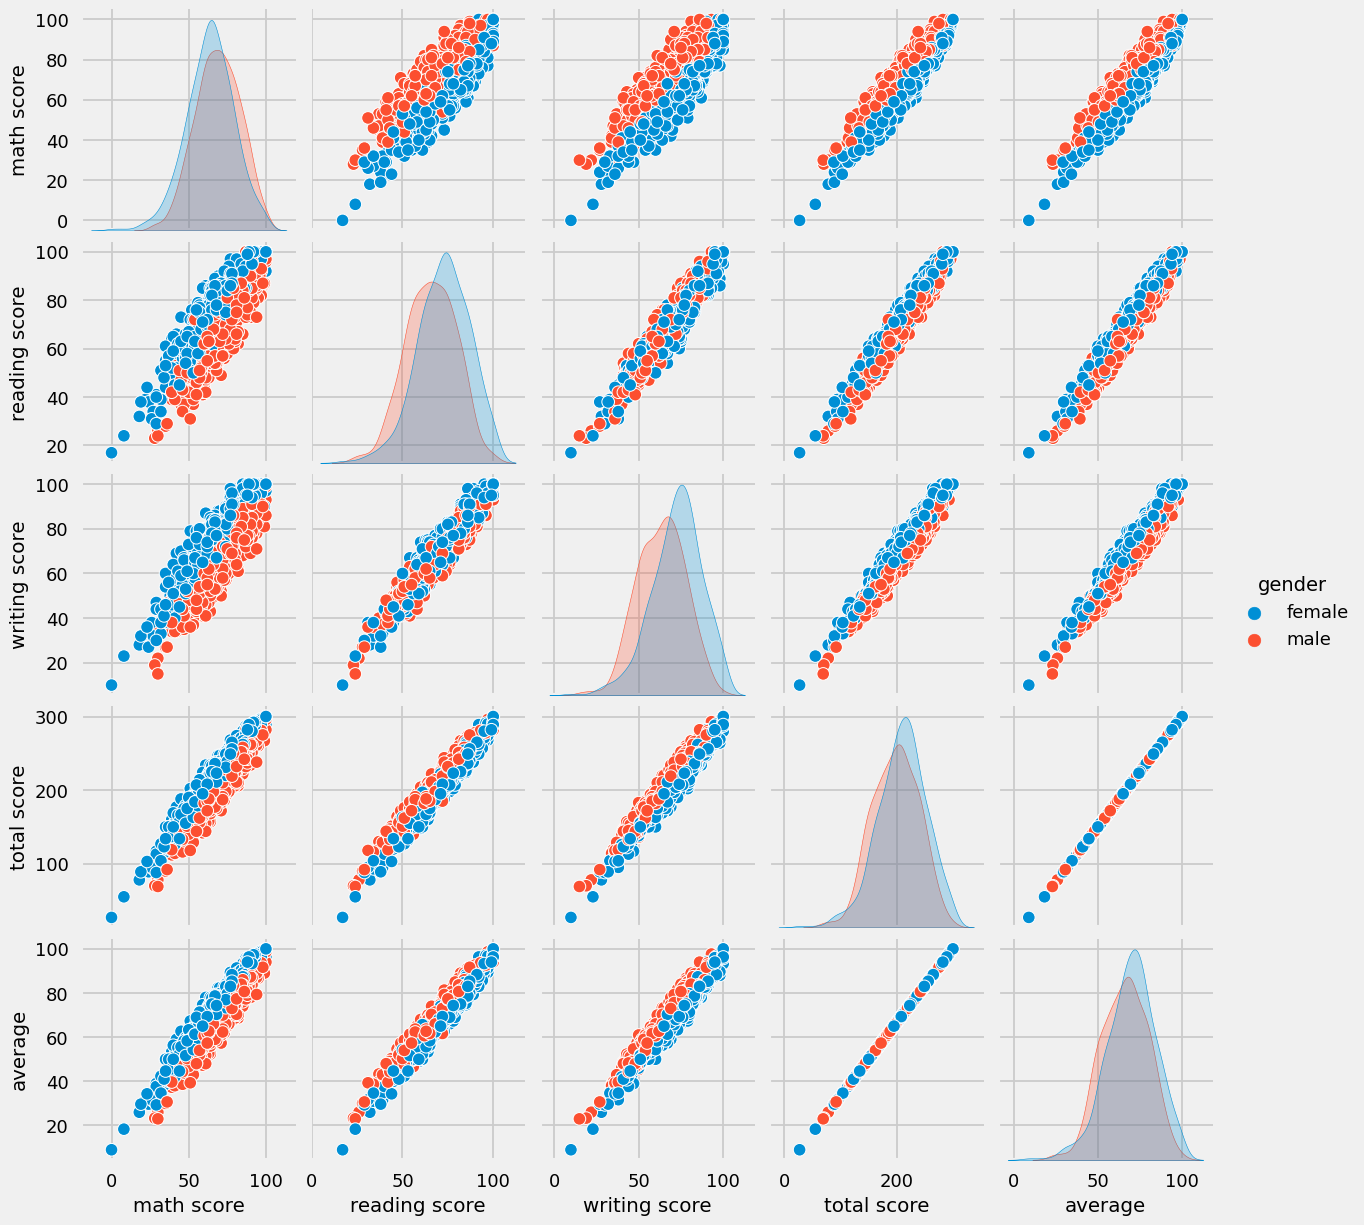

In [82]:
sns.pairplot(df,hue = 'gender')
plt.show()

5. Conclusions
- A student's performance is related to lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Having a standard lunch over the free/reduced lunch helps a student perform better
- Finishing preparation course is benefitial
- Students from a lower socioeconomic status have a lower average in all course subjects
- The score of student whose parents possess a master's or bachelor level education are higher than others